<div style="border:solid green 2px; padding: 20px">
Дмитрий, привет!

Меня зовут Лена Кончева, я код-ревьюер твоего проекта. Предлагаю общаться на «ты», если это комфортно. Если нет — дай знать и перейдём на «вы». 

Это учебный проект, поэтому бояться ошибок не нужно. Моя задача не указать тебе на них, а помочь тебе стать аналитиком данных, поделившись своим опытом.

---

Я буду использовать комментарии разного цвета, пожалуйста, не изменяй и не удаляй их:

<div class="alert alert-block alert-danger">
    

### Комментарий от ревьюера №1 (необходимо исправить)

Такой комментарий используется для критичных ошибок, которые обязательно нужно исправить, иначе проект не будет принят
</div>
    
---

<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера №1 (можно лучше)


Такой комментарий указывает на некритичные ошибки или содержит рекомендации. Тебе решать, учитывать его в этом проекте или нет.
</div>

---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера №1 (ОК)

Такой комментарий указывает на удачные и красивые решения :)
</div>

---

Если ты что-то изменяешь в проекте по моим комментариям, пожалуйста, пиши об этом и выделяй описание каким-то заметным цветом. Так мне будет проще отследить изменения. Например, можно оформить вот так:

---

<div class="alert alert-block alert-info">
    

### Комментарий студента
Твой комментарий.

</div>

<div class="alert alert-block alert-info">
    

### Комментарий студента
Лена, привет! Спасибо большое за обратную связь, постараюсь сделать всё в лучшем виде!

</div>

# Увеличение выручки интернет-магазина (приоритизация гипотез/анализ результатов A/B теста)

**Цели проекта**:
1. [**Приоритизация гипотез по увеличению выручки**](#1)

Отделом маркетинга был сформирован список предложений по увеличению выручки магазина, которые необходимо проанализировать с целью выбора оптимального способа приоритезации.

2. [**Анализ результатов проведённого A/B тестирования**](#2)

Одна из гипотез была проверена при помощи A/B теста - необходимо проанализировать промежуточные результаты и определить, привело ли новвоведение к статистически значимому изменению основных метрик (конверсия и средний чек). На основании вывода необходимо принять решение о приостановки теста или его продолжении. 

<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера №1 (можно лучше)

В водном блоке полезно формулировать цель проекта с точки зрения решаемой бизнес задачи. Например, сейчас не до конца ясно, зачем проводили тест.

</div>

<div class="alert alert-block alert-info">
    

### Комментарий студента
Честно говоря - мне и самому не до конца ясно, зачем мы проводили тест. А/B тест по сути - инструмент проверки гипотез, но вот какую гипотезу мы проверяем? Что за нововведение? По какому приниципу пользователи разделены на группы? Без этого понимания мне очень сложно писать не только выводы/рекомендации, но и делать должное описание проекта. Я обращался к препододавателю в Slack и к однокурсникам по этому вопросу - у всех как-то получилось сделать проект, даже не задумываясь об этом.
    
Я дополнил цель, уточнив проверяемые метрики. Если этого недостаточно - прошу дать развёрнутый комментарий, так как у меня кончились идеи. 🙈


</div>

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера №21 (2) (ОК)
Да, теперь введение более информативно. Действительно, анализируем конверсию и средний чек, и надо решить, продолжать ли тест.
</div>

<a id='1'></a>

## Приоритезация гипотез

Список гипотез представлен в файле `/datasets/hypothesis.csv`. Описание данных:

 * `Hypothesis` — краткое описание гипотезы
 * `Reach` — охват пользователей по 10-балльной шкале
 * `Impact` — влияние на пользователей по 10-балльной шкале
 * `Confidence` — уверенность в гипотезе по 10-балльной шкале
 * `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале
 
Посмотрим на таблицу:

In [1]:
# загружаем необходимые библиотеки

import pandas as pd
import numpy as np
import datetime as dt
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_colwidth', None)
sns.set_style('dark')
plt.rcParams.update({'axes.labelsize': 10,'axes.titlesize': 15})

In [2]:
# загружаем данные

data = pd.read_csv('/datasets/hypothesis.csv')
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Так как для каждой гипотезы указаны параметры `Reach`, `Impact`, `Confidence` и `Effort`, для приоритезации гипотез можно использовать фреймворки <a href="https://productfolio.com/ice-scoring/">**ICE**</a> и <a href="https://productfolio.com/rice-scoring/">**RICE**</a>. Применим оба способа и сравним результаты:

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера №2 (ОК)

Молодец, что выводишь названия гипотез целиком!
</div>

In [3]:
# приведём названия колонок к нижнему регистру

data.columns = data.columns.str.lower()

# расчитаем показатель ICE и отсортируем таблицу по приоритету

data['ICE'] = data['impact'] * data['confidence'] / data['efforts']

data[['hypothesis', 'ICE']].sort_values('ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Самый высокий результат у гипотезы с индексом `8` (акция в день рождения) самый же низкий - у индекса `4` (фон главной страницы). Этот способ не учитывает потенциальный охват пользователей, потому будет интересно сравнить его с результатом по методу **RICE**:

In [4]:
# теперь расчитаем показатель RICE и отсортируем таблицу по приоритету

data['RICE'] = data['reach'] * data['impact'] * data['confidence'] / data['efforts']

data[['hypothesis', 'RICE']].sort_values('RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера №3 (можно лучше)

Для удобства можно округлить значения в колонке ICE до 2 знака после запятой.

</div>

<div class="alert alert-block alert-info">
    

### Комментарий студента
Не очень понял этот комментарий - у меня во всём проекте дроби выводятся с 2-мя знаками после запятой, в том числе в таблице с ICE 🙈


</div>

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера №4 (ОК)

Молодец, что выводишь таблицу дважды, каждый раз с сортировкой по одному из фреймоврков - так различия в их работе максимально наглядны.
</div>

Результаты приоритезации двух методов отличаются - гипотеза с индексом `7`(форма подписки), занимающая третье место по методу **ICE**, вырывается в лидеры по методу **RICE**, причём со значительным отрывом. Гипотезы `0` и `6` также присутствуют в топе-4 результатов по обоим методам, а гипотеза `4` в любом случае занимает последнее место. Разница в результатах явно обусловлена учётом оценки потенциального охвата пользователей при использовании метода **RICE**. 

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера №5 (ОК)

Вывод по разделу содержит описание различий методов ICE и RICE.
</div>

<a id='2'></a>

## Анализ результатов A/B теста

Результаты проведённого A/B-теста зафиксированы в файлах `/datasets/orders.csv` и `/datasets/visitors.csv`. Описание данных:

Файл `/datasets/orders.csv`:

 * `transactionId` — идентификатор заказа;
 * `visitorId` — идентификатор пользователя, совершившего заказ;
 * `date` — дата, когда был совершён заказ;
 * `revenue` — выручка заказа;
 * `group` — группа A/B-теста, в которую попал заказ.
 
Файл `/datasets/visitors.csv`:
 * `date` — дата;
 * `group` — группа A/B-теста;
 * `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

### Обзор данных

In [5]:
# загружаем данные о заказах, переименуем колонки

orders = (
    pd.read_csv('/datasets/orders.csv', parse_dates=['date'])
    .rename(columns={'transactionId':'transaction_id',
                     'visitorId':'visitor_id'})
)

# выводим общую информацию о таблице и 5 случайных строк

orders.info()
orders.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


,transaction_id,visitor_id,date,revenue,group
29,2220299125,3803269165,2019-08-15,700,A
435,2430683444,2378935119,2019-08-28,20450,B
411,1696190144,1687240555,2019-08-06,24744,B
670,1096121493,1722729964,2019-08-29,620,B
983,1428722141,2261102418,2019-08-10,1950,B


Данные представлены пятью столбцами, 1 197 строк, явные пропуски отсутствуют. Посмотрим подробнее на данные о выручке: 

In [6]:
# посмотрим описательную статистику столбца с выручкой

orders['revenue'].describe()

count       1,197.00
mean        8,348.01
std        39,191.13
min            50.00
25%         1,220.00
50%         2,978.00
75%         8,290.00
max     1,294,500.00
Name: revenue, dtype: float64

Данные явно содержат выбросы - среднее практически в три раза превышает медианое значение, высокий уровень стандартного отклонения, огромная разница между третьим и четвёртым квартилем - при дальнейшем анализе необходимо будет это учесть. Теперь проверим данные на дубликаты:

In [7]:
# проверим на явные дубликаты

print(f' Задублированных строк - {orders.duplicated().sum()}')

# проверим, что нет пользователей, попавших в обе группы

inter = np.intersect1d(
    orders.query('group == "A"')['visitor_id'].unique(),
    orders.query('group == "B"')['visitor_id'].unique()
)
print(f' Уникальных пользователей, попавших в обе группы - {inter.size}')

 Задублированных строк - 0
 Уникальных пользователей, попавших в обе группы - 58


На каком-то из этапов проведения теста скорее всего произошла ошибка, которая привела к тому, что некоторые пользователи попали в обе группы. В виду незначительной доли, эти данные можно удалить без ущерба для исследования:

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера №6 (ОК)

Молодец, что выполняешь проверку пересечения групп.
</div>

In [8]:
# убираем ошибочные данные

orders = orders[~orders['visitor_id'].isin(inter)]

Перейдём к данным и визитах:

In [9]:
# загружаем данные о визитах

visitors = pd.read_csv('/datasets/visitors.csv', 
                       parse_dates=['date'])

# выводим общую информацию о таблице и 5 случайных строк

visitors.info()
visitors.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


,date,group,visitors
5,2019-08-06,A,667
56,2019-08-26,B,676
53,2019-08-23,B,546
25,2019-08-26,A,722
11,2019-08-12,A,595


Данные выглядят хорошо, можно приступать к анализу.

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера №7 (ОК)

Данные изучены!
</div>

### Кумулятивные метрики

Первым этапом анализа результатов теста станет расчёт кумулятивных показателей выручки, среднего чека и конверсии, а также их визуализация:

In [10]:
# создаем массив уникальных пар значений дат и групп теста

dates_groups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 

orders_agg = (
    dates_groups
    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                           orders['group'] == x['group'])]
           .agg({'date' : 'max', 
                 'group' : 'max', 
                 'transaction_id' : 'nunique', 
                 'visitor_id' : 'nunique', 
                 'revenue' : 'sum'}), axis=1)
    .sort_values(by=['date','group'])
)

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазин

visitors_agg = (
    dates_groups
    .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                             visitors['group'] == x['group'])]
           .agg({'date' : 'max', 
                 'group' : 'max', 
                 'visitors' : 'sum'}), axis=1)
    .sort_values(by=['date','group'])
)

# объединяем кумулятивные данные в одной таблице

cum_data = orders_agg.merge(visitors_agg, 
                            left_on=['date', 'group'], 
                            right_on=['date', 'group'])

cum_data.columns = ['date', 'group', 
                    'orders', 'buyers', 
                    'revenue', 'visitors']

# выводим 5 случайных строк финальной таблицы

cum_data.sample(5)

,date,group,orders,buyers,revenue,visitors
18,2019-08-10,A,170,158,1013731,6262
13,2019-08-07,B,135,132,909654,4644
0,2019-08-01,A,23,19,142779,719
6,2019-08-04,A,77,71,388030,2562
14,2019-08-08,A,144,133,727219,5239


Теперь все необходимые кумулятивные данные расчитаны и находятся в одной таблице. Визуализируем показатели выручки:

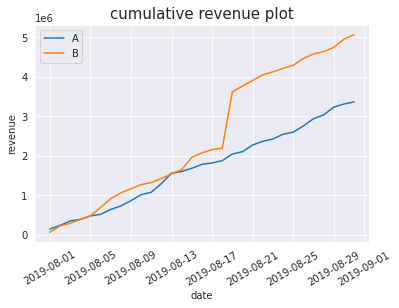

In [11]:
# создадим переменные для выручки каждой группы

revenue_a = cum_data[cum_data['group']=='A'][['date','revenue', 'orders']]
revenue_b = cum_data[cum_data['group']=='B'][['date','revenue', 'orders']]

# cтроим график

plt.plot(revenue_a['date'], revenue_a['revenue'], label='A')
plt.plot(revenue_b['date'], revenue_b['revenue'], label='B')

plt.legend()
plt.title('cumulative revenue plot')
plt.ylabel('revenue')
plt.xlabel('date')
plt.xticks(rotation=30) 
plt.grid()

plt.show()

* Группа А показывает стабильный рост выручки на протяжении проведения теста. Группа B опережает её, причём наблюдается резкий скачок примерно на середине теста - возможно это связано с попаданием в группу данных с выбросами.

Построим теперь график различия кумулятивного среднего чека:

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера №8 (ОК)
Да, всё верно. Пока мы не знаем, с чем связан скачок в группе B: с резким увеличением их количества или с ростом стоимости. 
</div>

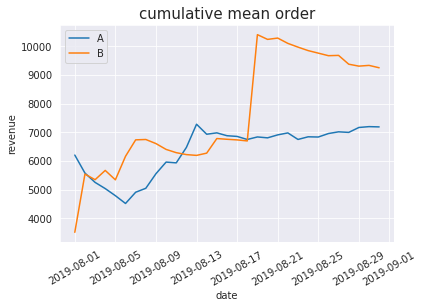

In [12]:
# cтроим график различия среднего чека

plt.plot(revenue_a['date'], 
         revenue_a['revenue']/revenue_a['orders'], 
         label='A')

plt.plot(revenue_b['date'], 
         revenue_b['revenue']/revenue_b['orders'], 
         label='B')

plt.legend()
plt.title('cumulative mean order')
plt.ylabel('revenue')
plt.xlabel('date')
plt.xticks(rotation=30) 
plt.grid()

plt.show()

* На середине теста средний чек группы А стабилизируется на уровне 7,000, у группы B примерно в это же время происходит скачок - ещё один повод подозревать наличие выбросов в данных этой группы. 

Посмотрим на относительное изменение среднего чека:

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера №9 (ОК)
Теперь мы видим резкий всплеск на графике, возможно, в середине теста в группу B попали крупные заказы.
</div>

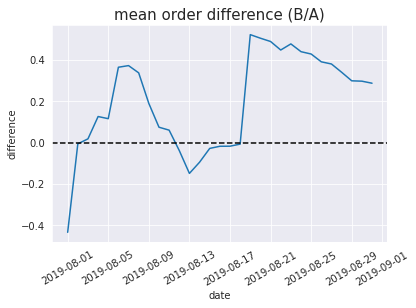

In [13]:
# собираем данные в одной таблице

revenue_ab = revenue_a.merge(revenue_b, left_on='date', 
                             right_on='date', how='left', 
                             suffixes=['_a', '_b'])

# cтроим отношение среднего чека группы B к группе A

plt.plot(revenue_ab['date'], 
         (revenue_ab['revenue_b']/revenue_ab['orders_b'])
         /(revenue_ab['revenue_a']/revenue_ab['orders_a'])-1)


plt.title('mean order difference (B/A)')
plt.ylabel('difference')
plt.xlabel('date')
plt.xticks(rotation=30) 
plt.axhline(y=0, color='black', linestyle='--')
plt.grid()

plt.show()

- Относительное изменение среднего чека имеет значительный и резкий характер - это ещё раз указывает на наличие аномальных данных в выборке группы B.

Последняя кумулятивная метрика - конверсия:

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера №10 (ОК)
Верно, крупные заказы и выбросы влияют на динамику.
</div>

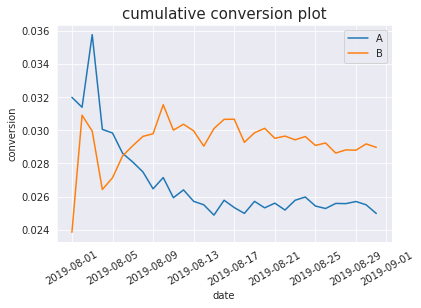

In [14]:
# посчитаем конверсию

cum_data['conversion'] = cum_data['orders']/cum_data['visitors']
cum_data_a = cum_data[cum_data['group']=='A']
cum_data_b = cum_data[cum_data['group']=='B']

# строим графики
plt.plot(cum_data_a['date'], cum_data_a['conversion'], label='A')
plt.plot(cum_data_b['date'], cum_data_b['conversion'], label='B')

plt.legend()
plt.title('cumulative conversion plot')
plt.ylabel('conversion')
plt.xlabel('date')
plt.xticks(rotation=30) 
plt.grid()

plt.show()

* Конверсия группы A совершает резкое падение в самом начале, после чего колеблется на уровне 0.25 на протяжении всего теста. Примерно тогда же группа B совершает скачок, после чего обе группы имееют схожую динамику колебания до конца теста, за тем исключением что группа B находится на более высоком уровне (~0.29).

Визуализируем относительное изменение этой метрики:

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера №11 (ОК)
Верно, конверсия группы B находится на более высоком уровне большую часть времени.
</div>

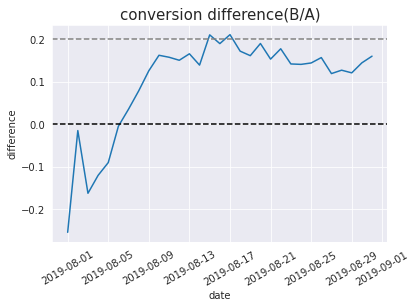

In [15]:
cum_conversion = (
    cum_data_a[['date','conversion']]
    .merge(cum_data_b[['date','conversion']], 
           left_on='date', right_on='date', 
           how='left', suffixes=['_a', '_b'])
)

plt.plot(cum_conversion['date'], 
         cum_conversion['conversion_b']/cum_conversion['conversion_a']-1
        )

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')

plt.title('conversion difference(B/A)')
plt.ylabel('difference')
plt.xlabel('date')
plt.xticks(rotation=30) 
plt.grid()

plt.show()


* Группа B лидирует по уровню прироста конверсии на протяжении почти всего периода проведения теста, неоднократно достигая уровня 20%.

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера №12 (ОК)
Конверсия группы B стабильно выше. Но, возможно, сильно влияние аномалий.
</div>

### Поиск аномальных значений
Большинство графиков из предыдущего шага наталкивают на мысль о том, что в данные одной из групп могли попасть выбросы или аномальные значения - необходимо проверить данные на их наличие и в случае обнаружения - пересчитать результаты.

Для начала посмотрим на количество заказов по пользователям:

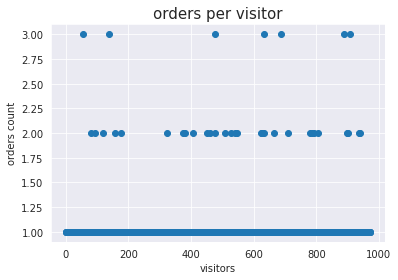

In [16]:
# сгруппируем данные для подсчёта количества заказов на каждого пользователя

orders_grouped = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_grouped.columns = ['visitor_id', 'orders']

# визуализируем результат

x_values = pd.Series(range(0, len(orders_grouped)))

plt.scatter(x_values, orders_grouped['orders'])

plt.title('orders per visitor')
plt.ylabel('orders count')
plt.xlabel('visitors')
plt.grid()

plt.show()

- График показывает, что абсолютное большинство пользователей делает не больше двух заказов. 

Расчитаем 95-ый и 99-ый процентили:

In [17]:
print(np.percentile(orders_grouped['orders'], [95, 99]))

[1. 2.]


Выходит, что не больше 5% пользователей делает более одного заказа! Соответственно все остальные данные можно считать аномальными. Проделаем такую же проверку для размера выручки:

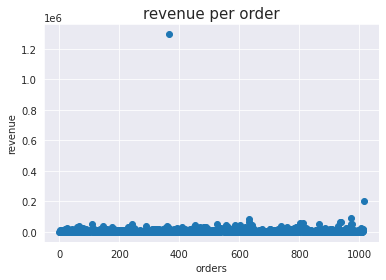

[26785. 53904.]


In [18]:
# строим график по выручке за заказ

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 

plt.title('revenue per order')
plt.ylabel('revenue')
plt.xlabel('orders')
plt.grid()

plt.show()

# рассчитаем перцентили

print(np.percentile(orders['revenue'], [95, 99]))

* На графике видны два явных выброса - первый на уровне 1.3 миллиона, другой нахходится на уровне 0.2 миллиона. При этом 99-ый перцентель по выручке составляет всего 53,904 - для корректного сравнения результатов теста необходимо будет обязательно учесть факт наличия этих выбросов, 99-ый перцентель подходит в качестве порога для среза.

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера №13 (ОК)
Такое определение выбросов корректно.
</div>

### Сравнение результатов теста (сырые данные)
Пришло время к непосредственному анализу результатов теста - сначала попробуем сравнить данные, которые были получены изначально. Для этого перегруппируем данные о результатах теста в новую таблицу:

In [19]:
# собираем данные о посещениях группы А

visitors_a = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a.columns = ['date', 'visitors_a']

# собираем данные о посещениях группы B

visitors_b = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b.columns = ['date', 'visitors_b']

# собираем данные о количестве заказов группы A

orders_a = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a.columns = ['date', 'orders_a', 'revenue_a']

# собираем данные о количестве заказов группы B

orders_b = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b.columns = ['date', 'orders_b', 'revenue_b']

# объединяем всё в общую таблицу

data = (
    orders_a.merge(
        orders_b, left_on='date', right_on='date', how='left'
    )
    .merge(visitors_a, left_on='date', right_on='date', how='left')
    .merge(visitors_b, left_on='date', right_on='date', how='left')
)

data.sample(5)

,date,orders_a,revenue_a,orders_b,revenue_b,visitors_a,visitors_b
17,2019-08-18,13,59581,7,35323,668,737
5,2019-08-06,15,40919,23,214842,667,655
25,2019-08-26,16,157214,22,173439,722,676
20,2019-08-21,20,170169,12,140347,646,656
10,2019-08-11,11,60665,12,53060,718,721


<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера №14 (можно лучше)

Этот код избыточен: нам не нужно собирать кумулятивные данные для проверки гипотез.

</div>

<div class="alert alert-block alert-info">
    

### Комментарий студента
Согласен. 🙈
Сделал как в тренажёре, не подумал как следует, эти данные действительно не пригодились. Код сократил, оставил только нужное.

</div>

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера №23 (2) (OK)

Так меньше лишнего кода!

</div>

Теперь у нас есть таблица `data`, где на каждую дату отображены основные показатели.

Первый шаг - сравнение показателей конверсии:

In [20]:
# сгруппируем данные по пользователям

orders_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_a.columns = ['visitor_id', 'orders']

orders_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_b.columns = ['visitor_id', 'orders']

# формируем выборки по каждой группе

sample_a = pd.concat(
    [
        orders_a['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_a'].sum() - len(orders_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b = pd.concat(
    [
        orders_b['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_b'].sum() - len(orders_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Проверим гипотезу о равенстве средних значений конверсии. Так как данные потенциально содержат выбросы, используем непараметрический тест Манна-Уитни.

**H0** - Средние значения не имеют статистически значимых отличий

**H1** - Значения имеют статистически значимые отличия

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера №15 (ОК)
Гипотезы сформулированы корректно. 
    
Верно, здесь уместен тест Уилкоксона-Манна-Уитни, так как у нас имеются выбросы, а сам тест работает с рангами, не учитывая сами значения.
</div>

In [21]:
alpha = 0.05 

results = st.mannwhitneyu(sample_a, sample_b)
difference = "{0:.2f}".format((sample_b.mean() / sample_a.mean() - 1)*100)

print('p-value: ', "{0:.3f}".format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 
    
print()    
print(f'Относительное различие средних значений выборок: {difference}%')    

p-value:  0.011
Отвергаем нулевую гипотезу: разница статистически значима

Относительное различие средних значений выборок: 15.98%


P-value не достигает уровня статистической значимости, что не удивительно - прирост конверсии в выборках составляет более 16% в пользу группы В.

Проверим такую же гипотезу относительно среднего чека:

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера №16 (ОК)
    
Верно, статистически значимая разница в конверсии есть по сырым данным. 
</div>

In [22]:
alpha = 0.05 

results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                          orders[orders['group']=='B']['revenue'])
difference = (
    '{0:.2f}'.format((orders[orders['group']=='B']['revenue'].mean()/
                               orders[orders['group']=='A']['revenue'].mean()-1)*100)
)

print('p-value: ', "{0:.3f}".format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 
    
print()    
print(f'Относительное различие средних значений выборок: {difference}%')    

p-value:  0.829
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя

Относительное различие средних значений выборок: 28.66%


Здесь же ситуация обратная - несмотря на значительное относительное различие значений выборок, высокий p-value говорит о том, что нельзя сделать вывод о статистически значимом различии значений в генеральной совокупности. Скорее всего это также обусловлено наличием выбросов в данных.

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера №17 (ОК)
    
Верно, по среднему чеку нет статистически значимой разницы по сырым данным. 
</div>

### Сравнение результатов теста (очищенные данные)
Во время работы с данными были обнаружены явные выбросы, которые могут иметь значительное влияние на результаты теста - попробуем повторить действия предыдущего этапа на срезе данных. Порог среза для конверсии - 95-ый перцентель, для среднего чека - 99-ый:

In [23]:
# зададим порог аномальных значений

orders_95 = int(np.percentile(orders_grouped['orders'], [95]))
revenue_99 = int(np.percentile(orders['revenue'], [99]))

# сгруппируем аномальных пользователей

orders_x = pd.concat(
    [
        orders_a[orders_a['orders'] > orders_95]['visitor_id'],
        orders_b[orders_b['orders'] > orders_95]['visitor_id'],
    ],
    axis=0,
)
revenue_x = orders[orders['revenue'] > revenue_99]['visitor_id']

abnormal_visitors = (
    pd.concat([orders_x, revenue_x], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [24]:
# формируем отфильтрованные выборки

sample_a_filtered = pd.concat(
    [
        orders_a[
            np.logical_not(orders_a['visitor_id'].isin(abnormal_visitors))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_a'].sum() - len(orders_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_b[
            np.logical_not(orders_b['visitor_id'].isin(abnormal_visitors))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_b'].sum() - len(orders_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [25]:
# повторяем проверку гипотезы о равенстве конверсии

alpha = 0.05 

results = st.mannwhitneyu(sample_a_filtered, sample_b_filtered)
difference = "{0:.2f}".format((sample_b_filtered.mean() / sample_a_filtered.mean() - 1)*100)

print('p-value: ', "{0:.3f}".format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 
    
print()    
print(f'Относительное различие средних значений выборок: {difference}%')    

p-value:  0.008
Отвергаем нулевую гипотезу: разница статистически значима

Относительное различие средних значений выборок: 18.76%


Результат в целом остался таким же - p-value так и не достигает статистической значимости, а прирост конверсии в группе B теперь ещё больше. Посмотрим на различие средних чеков:

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера №18 (ОК)
    
Верно, статистически значимая разница в конверсии есть как по сырым данным, так и по очищенным данным. 
</div>

In [26]:
# повторяем проверку гипотезы о равенстве средних чеков

alpha = 0.05 

results = (
    st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_visitors)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_visitors)),
                )
            ]['revenue'],
        )
    )


difference = (
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_visitors)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_visitors)),
            )
        ]['revenue'].mean()
        - 1
    )
)

print('p-value: ', "{0:.3f}".format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 
    
print()    
print(f'Относительное различие средних значений выборок: {difference}')    

p-value:  0.969
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя

Относительное различие средних значений выборок: 0.002


Проверка на срезе данных без выбросов теперь показывает соразмерный уровень относительной разницы значений, p-value вырос ещё сильнее, давая меньше поводов для предпологаемых различиях в данных.

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера №19 (ОК)
Верно, по среднему чеку статистической значимости как не было, так и нет.
</div>

____
**Выводы**

- Конверсия групп имеет статистически значимую разницу, вне зависимости от наличия выбросов в данных. Графики кумулятивных метрик и относительная разница средних значений выборок указывают на существенный успех группы B.

- Средние чеки групп не имееют статистически значимой разницы, вне зависимости от наличия выбросов в данных.

**Этих выводов достаточно для завершения теста и фиксирования победы группы B.**

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера №20 (ОК)
Вывод содержит ответ на главный вопрос проекта 👍
</div>

<div class="alert alert-block alert-success">
    

Проект необходимо доработать:
- сформулировать в водном блоке решаемую бизнес-задачу
- не собирать кумулятивные данные для проверки гипотез
</div>

<div class="alert alert-block alert-success">
    

(2) Проект принят, спасибо за доработки!
</div>